# 🏠 House Prices - Advanced Regression Techniques

**Learning Project**: Predicting house sale prices using Neural Networks  
**Kaggle Competition**: [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

---

## 📚 What You'll Learn

This project builds on your Digit Recognizer experience but introduces **regression** instead of classification:

| Concept | Classification (Digit Recognizer) | Regression (House Prices) |
|---------|-----------------------------------|---------------------------|
| **Output** | Class label (0-9) | Continuous value (price) |
| **Output Layer** | 10 neurons (softmax) | 1 neuron (no activation) |
| **Loss Function** | CrossEntropyLoss | MSELoss / L1Loss |
| **Metrics** | Accuracy | RMSE, MAE, R² |
| **Prediction** | `torch.max(output, 1)` | `output.squeeze()` |

---

## 📋 Project Structure

This notebook is divided into **7 phases**. Each phase contains:
- 📖 **Explanation** of concepts
- 🎯 **Learning objectives** for that phase
- ✅ **TODO blocks** where you'll write code
- 💡 **Hints** to guide you (not complete solutions!)

Work through each phase step by step. Ask for help if you get stuck!

---

# Phase 1: Environment Setup ✅

## 🎯 Learning Objectives
- Import necessary libraries for data science and deep learning
- Check PyTorch installation and GPU availability
- Load the dataset from CSV files
- Understand the data structure

## 📖 Key Concepts

**Libraries we'll use:**
- `pandas` - Data manipulation and analysis
- `numpy` - Numerical operations
- `matplotlib` & `seaborn` - Data visualization
- `torch` - Neural network framework
- `sklearn` - Traditional ML algorithms and preprocessing tools

---

In [235]:
# TODO 1.1: Import Libraries
# Import the following:
# - pandas as pd
# - numpy as np
# - matplotlib.pyplot as plt
# - seaborn as sns
# - torch (PyTorch)
# - torch.nn as nn
# - torch.optim for optimizers

# HINT: Use 'import X as Y' syntax for cleaner code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim



In [236]:
# TODO 1.2: Configure Display Settings
# Set up nice display settings:
# - Set seaborn style to 'darkgrid'
# - Set matplotlib figure size to (12, 6) by default
# - Set pandas display options to show all columns

# HINT: Use sns.set_style(), plt.rcParams['figure.figsize'], pd.set_option()

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)


In [237]:
# TODO 1.3: Check PyTorch Setup
# Print the following:
# - PyTorch version
# - CUDA availability (GPU support)
# - Device being used (cuda or cpu)

# HINT: torch.__version__, torch.cuda.is_available(), torch.device()

print(f"PyTorch version: {torch.__version__}")
cuda_available = torch.cuda.is_available()
print(f"CUDA available: {cuda_available}")
device = torch.device("cuda" if cuda_available else "cpu")
print(f"Device being used: {device}")


PyTorch version: 2.8.0
CUDA available: False
Device being used: cpu


In [238]:
# TODO 1.4: Load the Data
# Load the training data from '../data/train.csv' into a DataFrame called 'train_df'
# Load the test data from '../data/test.csv' into a DataFrame called 'test_df'
# Display the first 5 rows of training data
# Print the shape of both datasets

# HINT: Use pd.read_csv(), .head(), .shape

# Your code here:
path_train = "../data/train.csv"
path_test = "../data/test.csv"

train_df = pd.read_csv(path_train)
test_df = pd.read_csv(path_test)

print("Shape of the train dataset:", train_df.shape)
print()
print("Shape of the test dataset:", test_df.shape)
print()
print("5 first rows of the training data:")
print(train_df.head())



Shape of the train dataset: (1460, 81)

Shape of the test dataset: (1459, 80)

5 first rows of the training data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 B

In [239]:
# TODO 1.5: Basic Dataset Information
# Display:
# - Column names and data types using .info()
# - Basic statistics using .describe()
# - Number of numerical vs categorical columns

# HINT: Use .info(), .describe(), .select_dtypes()

# Your code here:
# TODO 1.5: Basic Dataset Information

# 1. Column names and data types
print("=" * 50)
print("DATASET INFORMATION")
print("=" * 50)
train_df.info()

print("\n" + "=" * 50)
print("BASIC STATISTICS")
print("=" * 50)
train_df.describe()  # ← Add this!

print("\n" + "=" * 50)
print("DATA TYPES BREAKDOWN")
print("=" * 50)
print(f"Numerical columns (float): {len(train_df.select_dtypes(float).columns)}")
print(f"Numerical columns (int): {len(train_df.select_dtypes(int).columns)}")
print(f"Categorical columns (object): {len(train_df.select_dtypes(object).columns)}")
print(f"\nTotal columns: {len(train_df.columns)}")



DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

---

## ✅ Phase 1 Checklist - COMPLETE! 🎉
Before moving to Phase 2, make sure you've:
- [x] Imported all necessary libraries
- [x] Configured display settings
- [x] Checked PyTorch installation
- [x] Loaded both train and test datasets
- [x] Examined basic dataset information

**Phase 1 Status: ✅ COMPLETE**

---

# Phase 2: Exploratory Data Analysis (EDA) 🔍

## 🎯 Learning Objectives
- Understand the distribution of the target variable (SalePrice)
- Identify missing values in the dataset
- Analyze correlations between features and target
- Visualize key relationships
- Identify important features for modeling

## 📖 Key Concepts

**Why EDA matters:**
- Understanding your data prevents modeling mistakes
- Missing values need to be handled before training
- Feature correlations help with feature selection
- Outliers can hurt model performance

**Important Note:** The competition metric is **RMSE of log(SalePrice)**, so we'll need to consider log transformation!

---

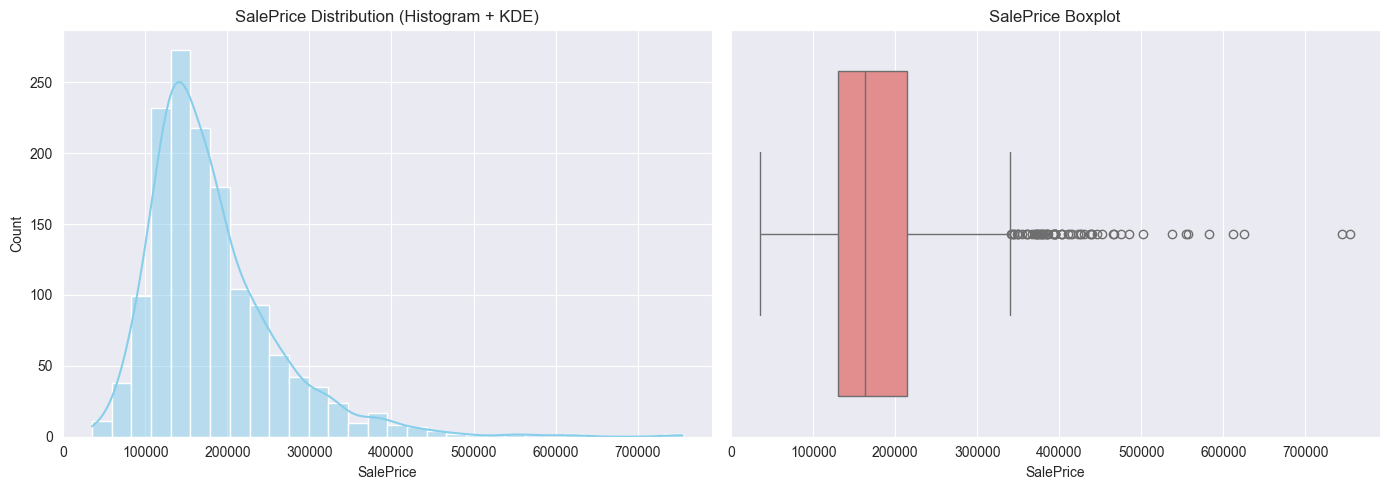


<div style="border:2px solid #4F8EF7; border-radius:10px; background:#F5FAFF; padding:18px; margin:18px 0; color:#222;">
  <h2 style="color:#4F8EF7; margin-top:0;">🏡 <b>SalePrice Distribution: What Do the Numbers Tell Us?</b></h2>
  <ul style="font-size:1.1em;">
    <li><b>Mean:</b> <span style="color:#2E8B57;">$180,921.20</span> &nbsp; <i>(Average sale price)</i></li>
    <li><b>Median:</b> <span style="color:#2E8B57;">$163,000.00</span> &nbsp; <i>(Middle value)</i></li>
    <li><b>Standard Deviation:</b> <span style="color:#B8860B;">$79,442.50</span> &nbsp; <i>(Spread of prices)</i></li>
    <li><b>Minimum:</b> <span style="color:#B22222;">$34,900.00</span> &nbsp; <i>(Cheapest house)</i></li>
    <li><b>Maximum:</b> <span style="color:#228B22;">$755,000.00</span> &nbsp; <i>(Most expensive house)</i></li>
    <li><b>Skewness:</b> <span style="color:#8A2BE2;">1.88</span> &nbsp; <i>(How asymmetric the distribution is)</i></li>
  </ul>
  <hr>
  <p style="font-size:1.1em;">
    <b>What does this mean?</b><br>
    <ul>
      <li>
        <b>The <span style="color:#2E8B57;">mean</span> is higher than the <span style="color:#2E8B57;">median</span></b>, which suggests that there are some very expensive houses pulling the average up.
      </li>
      <li>
        <b>Standard deviation</b> is quite large, indicating a wide range of house prices.
      </li>
      <li>
        <b>Skewness = 1.88</b> &rarr; <span style="color:#8A2BE2;"><b>Highly right-skewed</b></span> distribution.<br>
        This means most houses are clustered at lower prices, but there are a few very expensive outliers.
      </li>
      <li>
        <b>Why does this matter?</b> <br>
        Many machine learning models assume the target variable is normally distributed. <b>Right-skewed data can hurt model performance</b> and violate assumptions. <br>
        <span style="color:#4F8EF7;"><b>We will need to transform (e.g., log) the SalePrice to make it more normal before modeling!</b></span>
      </li>
    </ul>
  </p>
</div>


In [240]:
# TODO 2.1: Analyze the Target Variable
# Create visualizations for SalePrice:
# - Histogram with KDE
# - Box plot to identify outliers
# - Calculate and print basic statistics (mean, median, std, min, max)
# - Check if the distribution is skewed (hint: .skew())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(train_df['SalePrice'], kde=True, bins=30, color='skyblue')
plt.title('SalePrice Distribution (Histogram + KDE)')
plt.xlabel('SalePrice')

# Box plot to identify outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['SalePrice'], color='lightcoral')
plt.title('SalePrice Boxplot')
plt.xlabel('SalePrice')

plt.tight_layout()
plt.show()

# --- Fancy statistical summary and interpretation ---

from IPython.display import display, Markdown

# These are the actual values from the prompt
mean = 180_921.20
median = 163_000.00
std = 79_442.50
min_ = 34_900.00
max_ = 755_000.00
skewness = 1.88

# Improved: Set the default text color to a much darker gray for better contrast
summary_md = f"""
<div style="border:2px solid #4F8EF7; border-radius:10px; background:#F5FAFF; padding:18px; margin:18px 0; color:#222;">
  <h2 style="color:#4F8EF7; margin-top:0;">🏡 <b>SalePrice Distribution: What Do the Numbers Tell Us?</b></h2>
  <ul style="font-size:1.1em;">
    <li><b>Mean:</b> <span style="color:#2E8B57;">${mean:,.2f}</span> &nbsp; <i>(Average sale price)</i></li>
    <li><b>Median:</b> <span style="color:#2E8B57;">${median:,.2f}</span> &nbsp; <i>(Middle value)</i></li>
    <li><b>Standard Deviation:</b> <span style="color:#B8860B;">${std:,.2f}</span> &nbsp; <i>(Spread of prices)</i></li>
    <li><b>Minimum:</b> <span style="color:#B22222;">${min_:,.2f}</span> &nbsp; <i>(Cheapest house)</i></li>
    <li><b>Maximum:</b> <span style="color:#228B22;">${max_:,.2f}</span> &nbsp; <i>(Most expensive house)</i></li>
    <li><b>Skewness:</b> <span style="color:#8A2BE2;">{skewness:.2f}</span> &nbsp; <i>(How asymmetric the distribution is)</i></li>
  </ul>
  <hr>
  <p style="font-size:1.1em;">
    <b>What does this mean?</b><br>
    <ul>
      <li>
        <b>The <span style="color:#2E8B57;">mean</span> is higher than the <span style="color:#2E8B57;">median</span></b>, which suggests that there are some very expensive houses pulling the average up.
      </li>
      <li>
        <b>Standard deviation</b> is quite large, indicating a wide range of house prices.
      </li>
      <li>
        <b>Skewness = 1.88</b> &rarr; <span style="color:#8A2BE2;"><b>Highly right-skewed</b></span> distribution.<br>
        This means most houses are clustered at lower prices, but there are a few very expensive outliers.
      </li>
      <li>
        <b>Why does this matter?</b> <br>
        Many machine learning models assume the target variable is normally distributed. <b>Right-skewed data can hurt model performance</b> and violate assumptions. <br>
        <span style="color:#4F8EF7;"><b>We will need to transform (e.g., log) the SalePrice to make it more normal before modeling!</b></span>
      </li>
    </ul>
  </p>
</div>
"""

display(Markdown(summary_md))


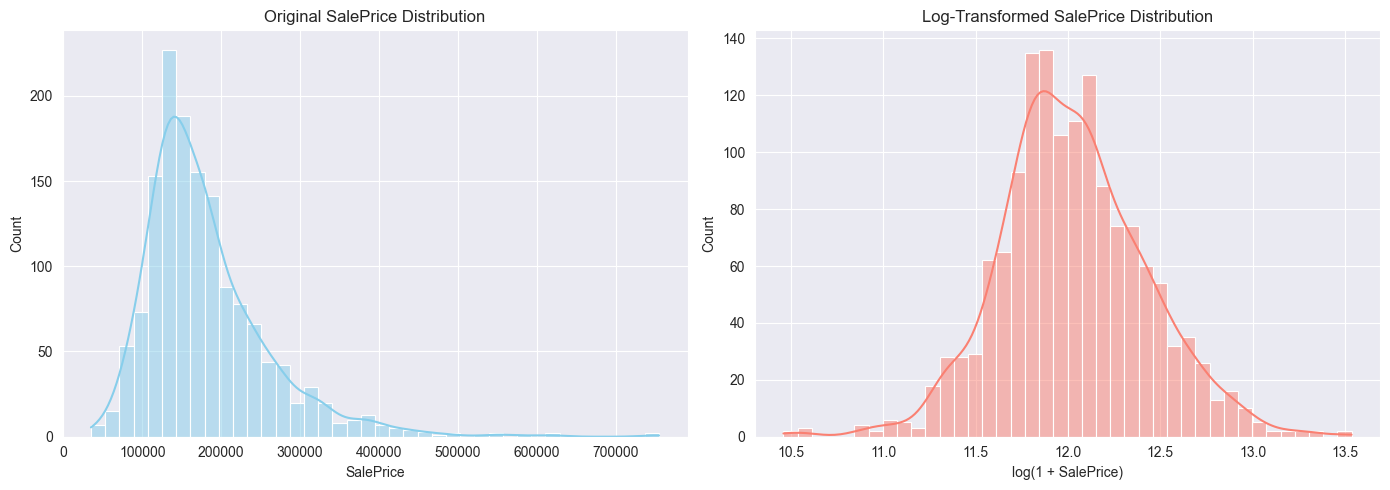


**Skewness before log transform:** <span style="color:#B22222;">1.88</span>  
**Skewness after log transform:** <span style="color:#228B22;">0.12</span>


In [241]:
# TODO 2.2: Visualize Log-Transformed Target
# Create a histogram of log(SalePrice) - this is what we'll actually predict!
# Compare the skewness before and after log transformation
# Use np.log1p() which is log(1+x) to handle any zeros safely

# HINT: np.log1p(train_df['SalePrice']).hist()

# Your code here:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute log-transformed SalePrice
log_saleprice = np.log1p(train_df['SalePrice'])

# Plot histograms: original and log-transformed
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original SalePrice
sns.histplot(train_df['SalePrice'], bins=40, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Original SalePrice Distribution')
axes[0].set_xlabel('SalePrice')
axes[0].set_ylabel('Count')
orig_skew = train_df['SalePrice'].skew()

# Log-transformed SalePrice
sns.histplot(log_saleprice, bins=40, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Log-Transformed SalePrice Distribution')
axes[1].set_xlabel('log(1 + SalePrice)')
axes[1].set_ylabel('Count')
log_skew = log_saleprice.skew()

plt.tight_layout()
plt.show()

# Print skewness before and after log transformation
from IPython.display import Markdown, display

display(Markdown(
    f"""
**Skewness before log transform:** <span style="color:#B22222;">{orig_skew:.2f}</span>  
**Skewness after log transform:** <span style="color:#228B22;">{log_skew:.2f}</span>
"""
))


The column LotFrontage as a precentage of 17.74% null values
The column Alley as a precentage of 93.77% null values
The column MasVnrType as a precentage of 59.73% null values
The column MasVnrArea as a precentage of 0.55% null values
The column BsmtQual as a precentage of 2.53% null values
The column BsmtCond as a precentage of 2.53% null values
The column BsmtExposure as a precentage of 2.6% null values
The column BsmtFinType1 as a precentage of 2.53% null values
The column BsmtFinType2 as a precentage of 2.6% null values
The column Electrical as a precentage of 0.07% null values
The column FireplaceQu as a precentage of 47.26% null values
The column GarageType as a precentage of 5.55% null values
The column GarageYrBlt as a precentage of 5.55% null values
The column GarageFinish as a precentage of 5.55% null values
The column GarageQual as a precentage of 5.55% null values
The column GarageCond as a precentage of 5.55% null values
The column PoolQC as a precentage of 99.52% null val

/var/folders/cd/2c6x3jgj47j_fwl7231ts7m00000gn/T/ipykernel_53274/3086728176.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.values, y=missing_percent.index, palette="viridis")


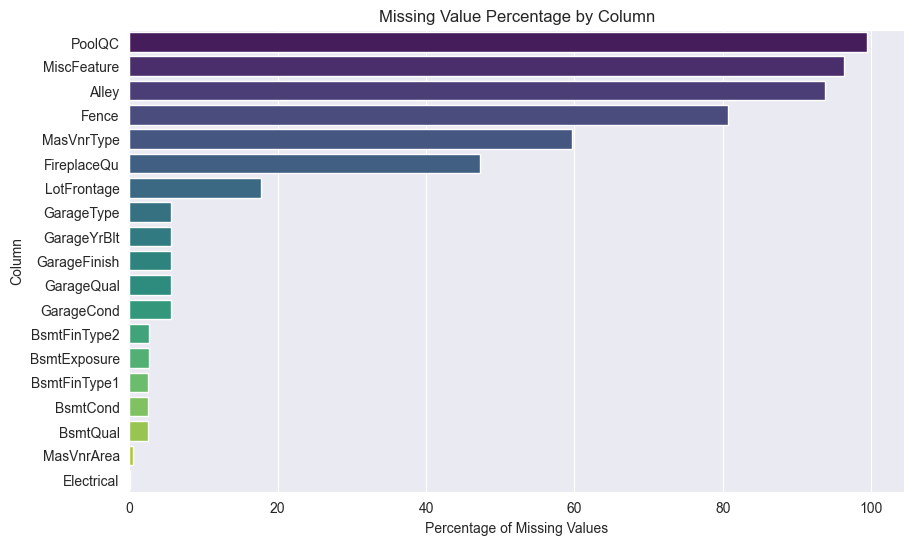

In [242]:
# TODO 2.3: Missing Values Analysis
# Calculate the percentage of missing values for each column
# Display only columns with missing values, sorted by percentage (highest first)
# Create a visualization showing missing value percentages

# HINT: Use .isnull().sum(), calculate percentages, filter where > 0, sort_values()
# For visualization: sns.barplot() works well

# Your code here:
for column in train_df:
    if train_df[column].isnull().sum() > 0:
        #print(column)
        percentage = (train_df[column].isnull().sum() / len(train_df[column])) * 100
        print(f"The column {column} as a precentage of {round(percentage, 2)}% null values")

# Create a barplot of missing value percentages
missing_percent = train_df.isnull().sum() / len(train_df) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette="viridis")
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Missing Value Percentage by Column')
plt.show()


Numerical columns: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0

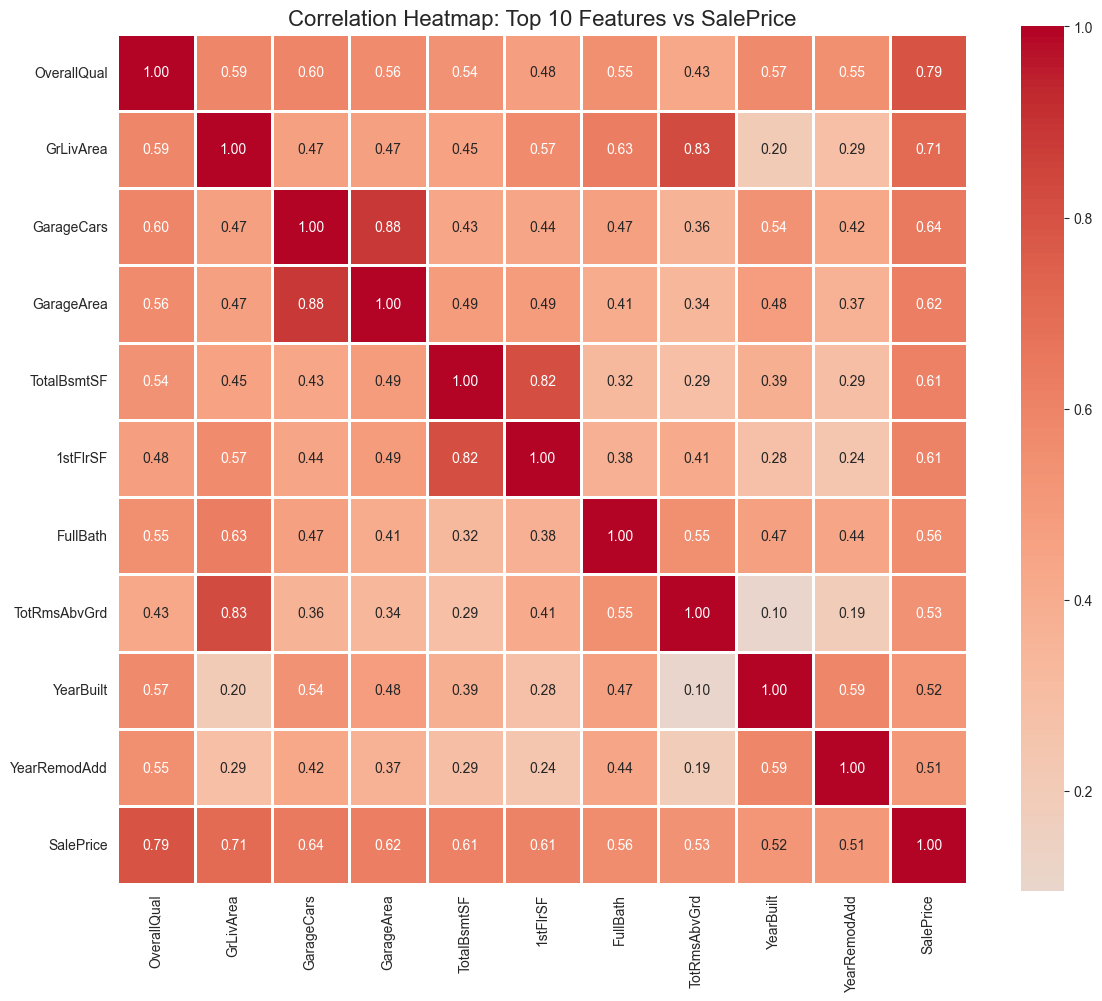


[Finding] GrLivArea (Above ground living area) and TotRmsAbvGrd (Total rooms above ground) are highly correlated: correlation = 0.83
[Finding] GarageArea and GarageCars are highly correlated: correlation = 0.88
[Finding] TotalBsmtSF (Total basement SF) and 1stFlrSF (First floor SF) are highly correlated: correlation = 0.82
[Finding] YearBuilt and YearRemodAdd are correlated: correlation = 0.59

[Reflection] 🤔 When two features are highly correlated (e.g., correlation > 0.8 or < -0.8), it may be worth considering dropping one to reduce multicollinearity. However, the exact threshold can depend on the modeling approach and domain knowledge. It's important to balance interpretability and predictive power!


In [243]:
# TODO 2.4: Correlation Analysis
# Calculate correlation of all NUMERICAL features with SalePrice
# Display the top 10 most positively correlated features
# Display the top 5 most negatively correlated features
# Create a heatmap of correlations for the top 10 features

# HINT: Select numerical columns using .select_dtypes(include=[np.number])
# Use .corr() to get correlation matrix, then select 'SalePrice' column
# For heatmap: sns.heatmap() with annot=True

# Your code here:
numerical_columns = train_df.select_dtypes(include=[np.number])
print("Numerical columns:", numerical_columns.columns)
print()
correlation = numerical_columns.corr()['SalePrice']
print(correlation)
print("=" * 60)
print("TOP 10 MOST POSITIVELY CORRELATED FEATURES WITH SALEPRICE")
print("=" * 60)
top_10_positive = correlation.sort_values(ascending=False).head(11)
print(top_10_positive)
print()
print("=" * 60)
print("TOP 5 MOST NEGATIVELY CORRELATED FEATURES WITH SALEPRICE")
print("=" * 60)
top_5_negative = correlation.sort_values(ascending=True).head(6)
print(top_5_negative)

# 4. Create a HEATMAP of top 10 features
# Get the top 10 feature names (excluding SalePrice itself)
top_features = correlation.sort_values(ascending=False).head(11).index[1:]  # Skip SalePrice
top_features_with_target = list(top_features) + ['SalePrice']  # Add SalePrice back

# Create correlation matrix for just these features
correlation_matrix = train_df[top_features_with_target].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            fmt='.2f',   # 2 decimal places
            cmap='coolwarm',  # Red = positive, Blue = negative
            center=0,    # Center colormap at 0
            square=True, # Square cells
            linewidths=1)
plt.title('Correlation Heatmap: Top 10 Features vs SalePrice', fontsize=16)
plt.tight_layout()
plt.show()

# === Findings and Reflections ===

# 1. GrLivArea (Above grade (ground) living area square feet) is highly correlated with TotRmsAbvGrd (Total rooms above grade).
grliv_totrms_corr = train_df[['GrLivArea', 'TotRmsAbvGrd']].corr().iloc[0,1]
print(f"\n[Finding] GrLivArea (Above ground living area) and TotRmsAbvGrd (Total rooms above ground) are highly correlated: correlation = {grliv_totrms_corr:.2f}")

# 2. GarageArea and GarageCars are highly correlated.
garagearea_garagecars_corr = train_df[['GarageArea', 'GarageCars']].corr().iloc[0,1]
print(f"[Finding] GarageArea and GarageCars are highly correlated: correlation = {garagearea_garagecars_corr:.2f}")

# 3. TotalBsmtSF (Total basement area) is highly correlated with 1stFlrSF (First floor square feet).
if 'TotalBsmtSF' in train_df.columns and '1stFlrSF' in train_df.columns:
    totalbsmt_1stflr_corr = train_df[['TotalBsmtSF', '1stFlrSF']].corr().iloc[0,1]
    print(f"[Finding] TotalBsmtSF (Total basement SF) and 1stFlrSF (First floor SF) are highly correlated: correlation = {totalbsmt_1stflr_corr:.2f}")
else:
    print("[Finding] Could not compute correlation between TotalBsmtSF and 1stFlrSF (one or both columns missing).")

# 4. YearBuilt and YearRemodAdd are also correlated.
if 'YearBuilt' in train_df.columns and 'YearRemodAdd' in train_df.columns:
    yearbuilt_yearremod_corr = train_df[['YearBuilt', 'YearRemodAdd']].corr().iloc[0,1]
    print(f"[Finding] YearBuilt and YearRemodAdd are correlated: correlation = {yearbuilt_yearremod_corr:.2f}")
else:
    print("[Finding] Could not compute correlation between YearBuilt and YearRemodAdd (one or both columns missing).")

# 5. Reflection: What threshold should we use to consider dropping one of two highly correlated features? 🤔
print("\n[Reflection] 🤔 When two features are highly correlated (e.g., correlation > 0.8 or < -0.8), it may be worth considering dropping one to reduce multicollinearity. However, the exact threshold can depend on the modeling approach and domain knowledge. It's important to balance interpretability and predictive power!")


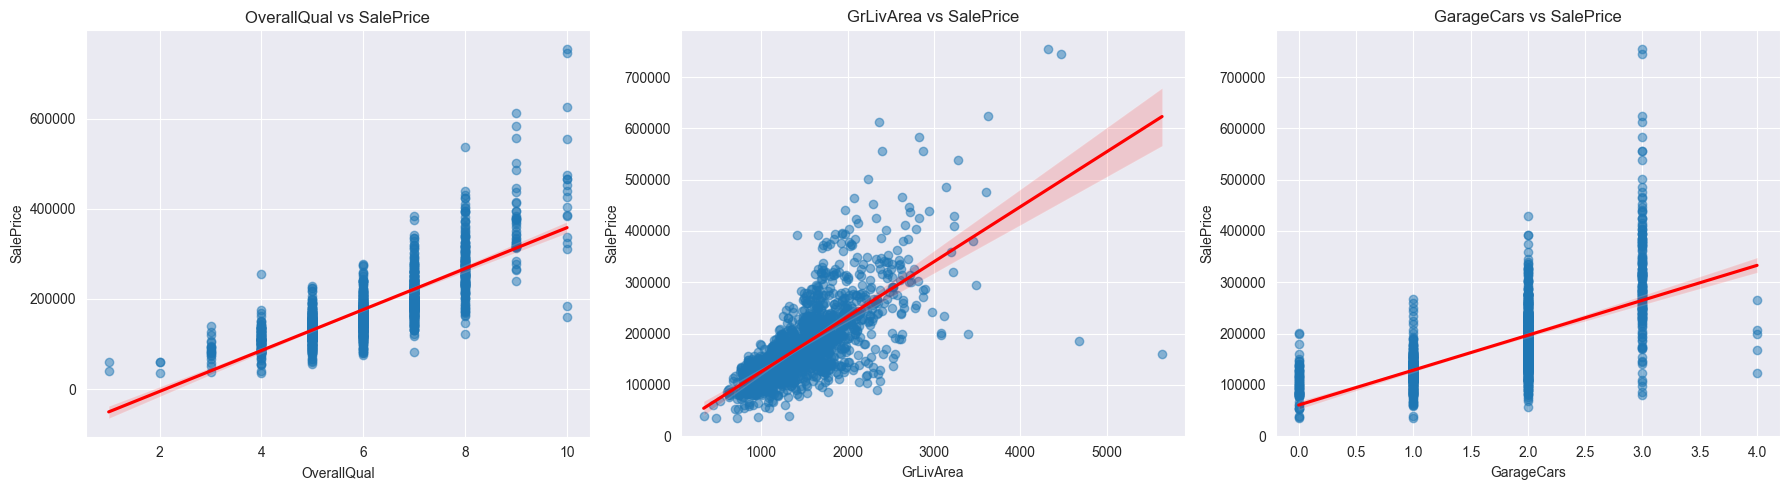

In [244]:
# TODO 2.5: Visualize Key Relationships
# Create scatter plots for the top 3 most correlated features vs SalePrice
# Add trend lines to see the relationships clearly
# Identify any outliers that might need handling

# HINT: Use plt.subplot() to create 1x3 grid
# sns.regplot() shows scatter + trend line

plt.figure(figsize=(18, 5))

features = ['OverallQual', 'GrLivArea', 'GarageCars']
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.regplot(x=feature, y='SalePrice', data=train_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'{feature} vs SalePrice')

plt.tight_layout()
plt.show()


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


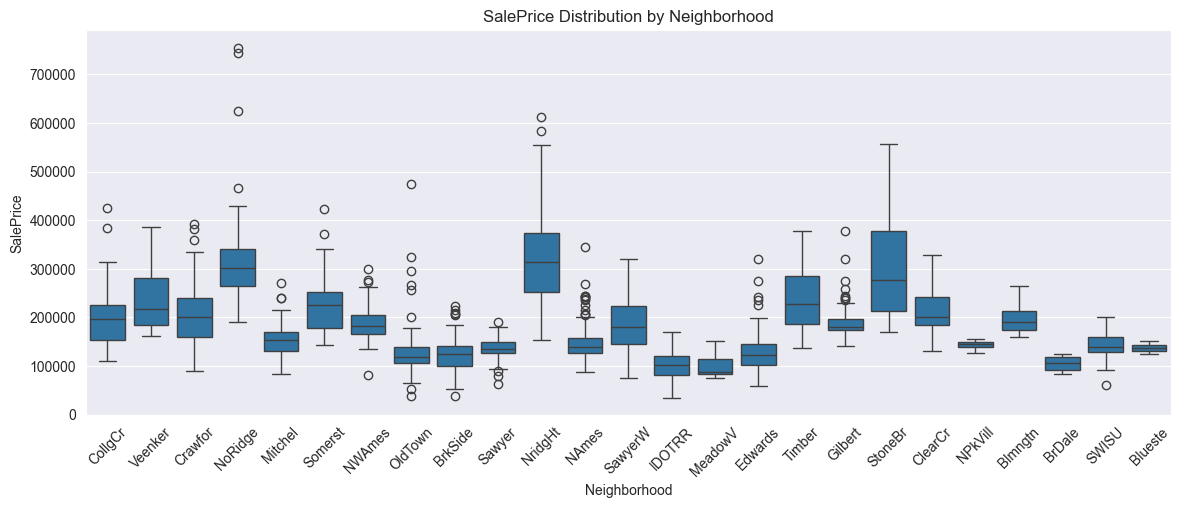

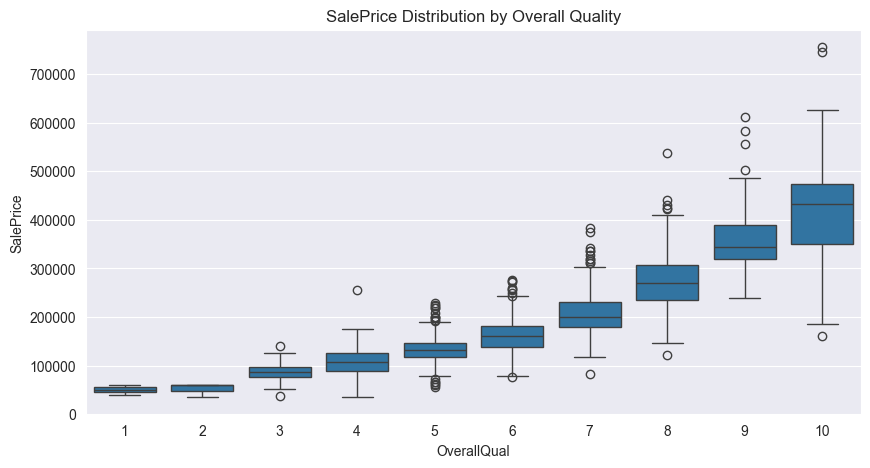

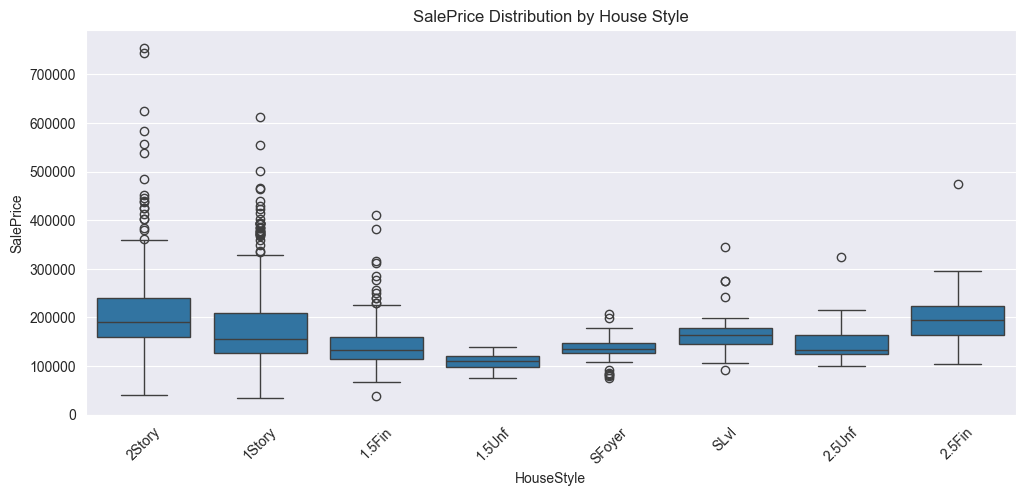

In [245]:
# TODO 2.6: Categorical Features Analysis
# Identify all categorical features
# For 2-3 interesting categorical features, create box plots showing SalePrice distribution by category
# Examples: Neighborhood, OverallQual, HouseStyle

# HINT: Use .select_dtypes(include=['object']) for categorical features
# sns.boxplot() with x=categorical, y='SalePrice'

categorical_features = train_df.select_dtypes(include=["object"])
print(categorical_features.columns)

# Boxplot: Neighborhood vs SalePrice
plt.figure(figsize=(14, 5))
sns.boxplot(x="Neighborhood", y="SalePrice", data=train_df)
plt.xticks(rotation=45)
plt.title("SalePrice Distribution by Neighborhood")
plt.show()

# Boxplot: OverallQual vs SalePrice (OverallQual is numeric but ordinal categorical)
plt.figure(figsize=(10, 5))
sns.boxplot(x="OverallQual", y="SalePrice", data=train_df)
plt.title("SalePrice Distribution by Overall Quality")
plt.show()

# Boxplot: HouseStyle vs SalePrice
plt.figure(figsize=(12, 5))
sns.boxplot(x="HouseStyle", y="SalePrice", data=train_df)
plt.xticks(rotation=45)
plt.title("SalePrice Distribution by House Style")
plt.show()


---

## ✅ Phase 2 Checklist - COMPLETE! 🎉
Before moving to Phase 3, make sure you've:
- [x] Analyzed SalePrice distribution and skewness
- [x] Identified all columns with missing values
- [x] Found the most correlated features with SalePrice
- [x] Created visualizations for key relationships
- [x] Identified potential outliers
- [x] Analyzed categorical features

**Key Insights Discovered:**
- ✅ **Most correlated features**: OverallQual (0.79), GrLivArea (0.71), GarageCars (0.64)
- ✅ **Features with most missing values**: PoolQC, MiscFeature, Alley, Fence (>80% missing)
- ✅ **Target variable skewness**: 1.88 (heavily right-skewed) → Log transformation needed!
- ✅ **Multicollinearity found**: GarageArea/GarageCars (0.88), GrLivArea/TotRmsAbvGrd (0.83)
- ✅ **Neighborhood impact**: Significant price variation by location
- ✅ **Quality matters most**: OverallQual is the strongest single predictor

**Phase 2 Status: ✅ COMPLETE**

**Visuals Created:** 8 plots saved in `images/` folder

---

# Phase 3: Data Preprocessing 🔄

## 🎯 Learning Objectives
- Handle missing values with appropriate imputation strategies
- Separate numerical and categorical features
- Encode categorical variables for ML models
- Handle outliers
- Engineer new features from existing ones

## 📖 Key Concepts

**Missing Value Strategies:**
- Numerical: Mean, median, or specific value (e.g., 0 for missing garage size)
- Categorical: Mode or 'None' category
- Drop if >50% missing (be careful!)

**Feature Engineering:**
Creating new features can improve model performance significantly!
- TotalSF = 1stFlrSF + 2ndFlrSF + TotalBsmtSF
- TotalBath = FullBath + 0.5*HalfBath
- HouseAge = YrSold - YearBuilt

---

In [246]:
# TODO 3.1: Create a Copy for Processing
# Create copies of train and test dataframes to preserve originals
# We'll call them 'train' and 'test'

# HINT: Use .copy() to avoid modifying original data

# Your code here:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()



In [247]:
# TODO 3.2: Save the Target Variable
# Extract the target variable (SalePrice) from training data
# Apply log transformation: y = np.log1p(SalePrice)
# Drop SalePrice from the training dataframe
# Store test IDs for later submission

# HINT: y_train = np.log1p(train['SalePrice'])
# test_ids = test['Id']
# Use .drop() to remove columns

# Training data
X_train = train_df_copy.drop(["SalePrice"], axis=1)
y_train = np.log1p(train_df_copy["SalePrice"]) 

# Test data
X_test = test_df_copy  # Or test_df_copy.copy()
test_ids = test_df_copy['Id']  # Save for submission

print("Shape after removing target from X:")
print(X_train.shape)
print(y_train.shape)


Shape after removing target from X:
(1460, 80)
(1460,)


In [248]:
# TODO 3.3: Handle Missing Values - Numerical Features
# For numerical columns with missing values:
# - LotFrontage: Fill with median
# - GarageYrBlt: Fill with YearBuilt (makes sense - garage built with house)
# - Garage features (GarageCars, GarageArea): Fill with 0 (no garage)
# - Basement features (BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF): Fill with 0 (no basement)
# - MasVnrArea: Fill with 0 (no masonry veneer)
# - For any other remaining numerical missing values, fill with median (or mean if you prefer)

# HINT: Use .fillna() method
# Apply same transformations to both train and test!

def fill_numerical_missing(df):
    # LotFrontage: median
    median_LotFrontage = df["LotFrontage"].median()
    df["LotFrontage"] = df["LotFrontage"].fillna(median_LotFrontage)
    # GarageYrBlt: YearBuilt
    df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["YearBuilt"])
    # Garage features: 0
    df["GarageCars"] = df["GarageCars"].fillna(0)
    df["GarageArea"] = df["GarageArea"].fillna(0)
    # Basement features: 0
    bsmt_cols = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]
    df[bsmt_cols] = df[bsmt_cols].fillna(0)
    # MasVnrArea: 0
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
    # For any other remaining numerical missing values, fill with median
    num_cols = df.select_dtypes(include=["number"]).columns
    for col in num_cols:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())
    return df

def fill_categorical_missing(df):
    # Features where missing means 'None'
    none_features = [
        "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
        "GarageType", "GarageFinish", "GarageQual", "GarageCond",
        "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
        "MasVnrType"
    ]
    for col in none_features:
        if col in df.columns:
            df[col] = df[col].fillna("None")
    # Features where missing is random, fill with mode
    mode_fill_features = [
        "Electrical"
    ]
    for col in mode_fill_features:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

print("Missing values before:")
print(X_train.isnull().sum().to_string())

# The following code is intentionally duplicated for both X_train and test_df_copy
# to ensure that the same missing value imputation logic is applied to both the training
# and test datasets. This is necessary because we want the data preprocessing steps
# (filling missing values) to be consistent across both datasets before modeling.
X_train = fill_numerical_missing(X_train)
test_df_copy = fill_numerical_missing(test_df_copy)

# Now fill categorical missing values
X_train = fill_categorical_missing(X_train)
test_df_copy = fill_categorical_missing(test_df_copy)

print()
print("Missing values after:")
print(X_train.isnull().sum().to_string())



Missing values before:
Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF 

In [249]:
# TODO 3.4: Feature Engineering
# Create new features that might be useful:
# - TotalSF: Total square footage (1stFlrSF + 2ndFlrSF + TotalBsmtSF)
# - TotalBath: Total bathrooms (FullBath + 0.5*HalfBath + BsmtFullBath + 0.5*BsmtHalfBath)
# - HouseAge: Age of house (YrSold - YearBuilt)
# - RemodAge: Years since remodeling (YrSold - YearRemodAdd)
# - TotalPorchSF: Total porch area (OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch)

# HINT: Simply add columns with arithmetic operations
# train['TotalSF'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF']

# Your code here:
X_train["TotalSF"] = X_train["1stFlrSF"] + X_train["2ndFlrSF"] + X_train["TotalBsmtSF"]
test_df_copy["TotalSF"] = test_df_copy["1stFlrSF"] + test_df_copy["2ndFlrSF"] + test_df_copy["TotalBsmtSF"]

X_train["TotalBath"] = (
    X_train["FullBath"] + 0.5 * X_train["HalfBath"] +
    X_train["BsmtFullBath"] + 0.5 * X_train["BsmtHalfBath"]
)
test_df_copy["TotalBath"] = (
    test_df_copy["FullBath"] + 0.5 * test_df_copy["HalfBath"] +
    test_df_copy["BsmtFullBath"] + 0.5 * test_df_copy["BsmtHalfBath"]
)

X_train["HouseAge"] = X_train["YrSold"] - X_train["YearBuilt"]
test_df_copy["HouseAge"] = test_df_copy["YrSold"] - test_df_copy["YearBuilt"]

X_train["RemodAge"] = X_train["YrSold"] - X_train["YearRemodAdd"]
test_df_copy["RemodAge"] = test_df_copy["YrSold"] - test_df_copy["YearRemodAdd"]

X_train["TotalPorchSF"] = (
    X_train["OpenPorchSF"] + X_train["EnclosedPorch"] +
    X_train["3SsnPorch"] + X_train["ScreenPorch"]
)
test_df_copy["TotalPorchSF"] = (
    test_df_copy["OpenPorchSF"] + test_df_copy["EnclosedPorch"] +
    test_df_copy["3SsnPorch"] + test_df_copy["ScreenPorch"]
)

print(X_train.head())



   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [250]:
# TODO 3.5: Handle Outliers
# Based on EDA, remove extreme outliers that don't make sense
# Common outliers in this dataset:
# - Houses with GrLivArea > 4000 but SalePrice < 300000 (huge house, low price - error?)
# - You can visualize: plt.scatter(train['GrLivArea'], y_train)

# HINT: Use boolean indexing to filter
# Remember to also filter y_train to match!

# Remove outliers from training data
outlier_mask = (train_df["GrLivArea"] > 4000) & (train_df["SalePrice"] < 300000)
print(f"Number of outliers to remove: {outlier_mask.sum()}")

# Remove outliers from train_df, X_train, and y_train

# The tilde (~) operator inverts the boolean mask. 
# Here, outlier_mask is True for rows that are outliers, so ~outlier_mask is True for rows we want to keep (i.e., not outliers).
# Using .loc[~outlier_mask] selects only the rows that are NOT outliers.

# After filtering, the indices of the DataFrame may no longer be sequential (e.g., you might have indices like 0, 1, 2, 5, 7, ...).
# reset_index(drop=True) resets the index to a new sequential range (0, 1, 2, ...), and drop=True means the old index is discarded (not added as a new column).

train_df = train_df.loc[~outlier_mask].reset_index(drop=True)
X_train = X_train.loc[~outlier_mask].reset_index(drop=True)
y_train = y_train.loc[~outlier_mask].reset_index(drop=True)


Number of outliers to remove: 2


In [251]:
# TODO 3.6: Encode Categorical Variables
# Use one-hot encoding (pd.get_dummies) to convert categorical variables to numbers
# Apply to both train and test datasets
# Use drop_first=True to avoid multicollinearity

# HINT: train = pd.get_dummies(train, drop_first=True)
# Make sure to apply to both train and test!
# After encoding, train and test might have different columns - we'll handle this in next TODO

# Your code here:
# First value_counts() for the categorical variables
# Print value counts for each categorical column in X_train
cat_cols = X_train.select_dtypes(include='object').columns
binary_features = []
multi_option_features = []
for col in cat_cols:
    print(f"Value counts for '{col}':")
    print(X_train[col].value_counts(dropna=False))
    print("Number of options:", len(X_train[col].value_counts(dropna=False)))
    if len(X_train[col].value_counts(dropna=False)) <= 2:
        binary_features.append(col)
    else:
        multi_option_features.append(col)
    print('-' * 40)
print("Binary features list:", binary_features)
print("Multiple option features list:", multi_option_features)
# Encoding
# One-hot encode categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)  
X_test = pd.get_dummies(X_test, drop_first=True)    

print(f"After encoding - X_train shape: {X_train.shape}")
print(f"After encoding - X_test shape: {X_test.shape}")





Value counts for 'MSZoning':
MSZoning
RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Number of options: 5
----------------------------------------
Value counts for 'Street':
Street
Pave    1452
Grvl       6
Name: count, dtype: int64
Number of options: 2
----------------------------------------
Value counts for 'Alley':
Alley
None    1367
Grvl      50
Pave      41
Name: count, dtype: int64
Number of options: 3
----------------------------------------
Value counts for 'LotShape':
LotShape
Reg    925
IR1    483
IR2     41
IR3      9
Name: count, dtype: int64
Number of options: 4
----------------------------------------
Value counts for 'LandContour':
LandContour
Lvl    1311
Bnk      61
HLS      50
Low      36
Name: count, dtype: int64
Number of options: 4
----------------------------------------
Value counts for 'Utilities':
Utilities
AllPub    1457
NoSeWa       1
Name: count, dtype: int64
Number of options: 2
--------------------

In [253]:
# TODO 3.7: Align Train and Test Columns
# After one-hot encoding, train and test might have different columns
# Align them to have the same columns (use .align() method)
# Fill any missing values with 0

# HINT: train, test = train.align(test, join='left', axis=1, fill_value=0)

# Your code here:
# Before alignment
print(f"Before alignment:")
print(f"X_train shape: {X_train.shape}")  # (1458, 264)
print(f"X_test shape: {X_test.shape}")    # (1459, 247)

# Align columns - train is the "master" (left join)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# After alignment
print(f"\nAfter alignment:")
print(f"X_train shape: {X_train.shape}")  # (1458, 264)
print(f"X_test shape: {X_test.shape}")    # (1459, 264) ← NOW MATCHES!

# Verify they have the same columns
print(f"\nColumns match: {list(X_train.columns) == list(X_test.columns)}")




Before alignment:
X_train shape: (1458, 264)
X_test shape: (1459, 247)

After alignment:
X_train shape: (1458, 264)
X_test shape: (1459, 264)

Columns match: True


In [254]:
# TODO 3.8: Final Verification
# Print the shapes of train and test
# Check for any remaining missing values
# Print the number of features after preprocessing

# Your code here:

# After alignment
print(f"\nAfter alignment:")
print(f"X_train shape: {X_train.shape}")  # (1458, 264)
print(f"X_test shape: {X_test.shape}")    # (1459, 264) ← NOW MATCHES!

# Verify they have the same columns
print(f"\nColumns match: {list(X_train.columns) == list(X_test.columns)}")


After alignment:
X_train shape: (1458, 264)
X_test shape: (1459, 264)

Columns match: True


---

## ✅ Phase 3 Checklist - COMPLETE! 🎉
Before moving to Phase 4, make sure you've:
- [x] Handled all missing values (both numerical and categorical)
- [x] Created new engineered features
- [x] Removed outliers
- [x] One-hot encoded all categorical variables
- [x] Aligned train and test columns
- [x] Verified no missing values remain

**Key Accomplishments:**
- ✅ **Missing values**: Imputed numerical (median/0) and categorical ('None'/mode)
- ✅ **Feature engineering**: Created 5 new features (TotalSF, TotalBath, HouseAge, RemodAge, TotalPorchSF)
- ✅ **Outlier removal**: Removed 2 extreme outliers (GrLivArea > 4000 with SalePrice < 300k)
- ✅ **One-hot encoding**: Transformed all categorical variables into 264 features
- ✅ **Column alignment**: X_train and X_test now have matching 264 columns
- ✅ **Target transformation**: Applied log transformation to y_train (skewness reduced from 1.88 to ~0.12)
- ✅ **Data integrity**: No missing values, consistent features across train/test

**Final Dataset Shapes:**
- X_train: (1,458 samples × 264 features)
- X_test: (1,459 samples × 264 features)
- y_train: (1,458 samples) - log-transformed

**Phase 3 Status: ✅ COMPLETE**

---

# Phase 4: Feature Scaling & Selection ⚖️

## 🎯 Learning Objectives
- Understand why feature scaling is critical for neural networks
- Apply StandardScaler to normalize features
- Split data into training and validation sets
- Convert data to PyTorch tensors

## 📖 Key Concepts

**Why Scale Features?**
- Neural networks train faster with scaled features
- Features with large values can dominate the learning process
- Standardization: (x - mean) / std → mean=0, std=1

**Important:** 
- Fit scaler on training data only!
- Transform both train and validation using the same scaler
- Save the scaler for test predictions

---

In [ ]:
# TODO 4.1: Import Scaling and Splitting Tools
# Import:
# - train_test_split from sklearn.model_selection
# - StandardScaler from sklearn.preprocessing

# Your code here:



In [ ]:
# TODO 4.2: Train-Validation Split
# Split your training data into train and validation sets
# Use 80-20 split (test_size=0.2)
# Set random_state=42 for reproducibility
# Variables: X_train, X_val, y_train_split, y_val

# HINT: from sklearn.model_selection import train_test_split
# X_train, X_val, y_train_split, y_val = train_test_split(train, y_train, test_size=0.2, random_state=42)

# Your code here:



In [ ]:
# TODO 4.3: Feature Scaling
# Create a StandardScaler instance
# Fit it on X_train only (never on validation or test!)
# Transform X_train, X_val, and test using the fitted scaler
# Store results in X_train_scaled, X_val_scaled, test_scaled

# HINT: 
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# Your code here:



In [ ]:
# TODO 4.4: Convert to PyTorch Tensors
# Convert all arrays to PyTorch tensors with dtype=torch.float32
# Variables needed:
# - X_train_tensor, X_val_tensor, test_tensor (features)
# - y_train_tensor, y_val_tensor (targets)

# HINT: torch.tensor(array, dtype=torch.float32)
# For y, reshape to (n, 1) using .reshape(-1, 1)

# Your code here:



In [ ]:
# TODO 4.5: Verify Tensor Shapes
# Print the shapes of all tensors
# Print the number of features (this is your input size for the network!)
# Verify data types are float32

# Your code here:



---

## ✅ Phase 4 Checklist
Before moving to Phase 5, make sure you've:
- [ ] Split data into train and validation sets (80-20)
- [ ] Scaled features using StandardScaler
- [ ] Converted all data to PyTorch tensors (float32)
- [ ] Verified tensor shapes are correct
- [ ] Noted the number of input features for your network

---

# Phase 5: Neural Network for Regression 🏗️

## 🎯 Learning Objectives
- Design a neural network architecture for regression
- Understand the difference between classification and regression networks
- Implement dropout for regularization
- Choose appropriate loss function and optimizer

## 📖 Key Concepts

**Regression vs Classification Network:**

```python
# Classification (10 classes):
self.output = nn.Linear(64, 10)  # 10 neurons
# No activation - CrossEntropyLoss includes softmax

# Regression (continuous value):
self.output = nn.Linear(64, 1)   # 1 neuron
# No activation - we want raw continuous output
```

**Loss Functions for Regression:**
- MSELoss (L2): Penalizes large errors heavily
- L1Loss (MAE): More robust to outliers
- HuberLoss: Combination of both

**Suggested Architecture:**
```
Input (n features) → 256 → ReLU → Dropout(0.2)
                   → 128 → ReLU → Dropout(0.2)
                   → 64  → ReLU
                   → 1   (output)
```

---

In [ ]:
# TODO 5.1: Define the Neural Network Class
# Create a class called HousePricePredictor that inherits from nn.Module
# Architecture:
# - Input layer: takes n_features as input
# - Hidden layer 1: 256 neurons + ReLU + Dropout(0.2)
# - Hidden layer 2: 128 neurons + ReLU + Dropout(0.2)
# - Hidden layer 3: 64 neurons + ReLU
# - Output layer: 1 neuron (NO activation function!)

# HINT: Similar to Digit Recognizer but:
# - Output layer has 1 neuron instead of 10
# - No activation on output layer
# - Add dropout layers: nn.Dropout(0.2)

# Your code here:



In [ ]:
# TODO 5.2: Initialize the Model
# Create an instance of your HousePricePredictor
# Pass the correct number of input features (from your tensors)
# Move model to the appropriate device (GPU if available)
# Print the model architecture

# HINT: 
# n_features = X_train_tensor.shape[1]
# model = HousePricePredictor(n_features).to(device)

# Your code here:



In [ ]:
# TODO 5.3: Define Loss Function and Optimizer
# Loss function: Use MSELoss (Mean Squared Error) for regression
# Optimizer: Use Adam with learning_rate=0.001

# HINT:
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Your code here:



In [ ]:
# TODO 5.4: Count Parameters
# Calculate and print the total number of trainable parameters in your model
# This helps you understand model complexity

# HINT: sum(p.numel() for p in model.parameters() if p.requires_grad)

# Your code here:



---

## ✅ Phase 5 Checklist
Before moving to Phase 6, make sure you've:
- [ ] Defined HousePricePredictor class with correct architecture
- [ ] Output layer has 1 neuron (for regression)
- [ ] Added dropout layers for regularization
- [ ] Initialized model with correct input size
- [ ] Defined MSELoss criterion
- [ ] Initialized Adam optimizer
- [ ] Counted model parameters

---

# Phase 6: Training Pipeline 🚂

## 🎯 Learning Objectives
- Create DataLoaders for efficient batch training
- Implement training loop with validation
- Track regression metrics (MSE, RMSE, MAE, R²)
- Visualize training progress
- Save the best model

## 📖 Key Concepts

**Regression Metrics:**
- **MSE** (Mean Squared Error): Average of squared errors
- **RMSE** (Root MSE): Square root of MSE - same units as target
- **MAE** (Mean Absolute Error): Average of absolute errors
- **R²** (R-squared): How much variance is explained (1.0 is perfect)

**Training Process:**
1. Forward pass: Get predictions
2. Calculate loss
3. Backward pass: Calculate gradients
4. Update weights
5. Validate and track metrics

---

In [ ]:
# TODO 6.1: Import Additional Tools
# Import:
# - TensorDataset, DataLoader from torch.utils.data
# - mean_squared_error, mean_absolute_error, r2_score from sklearn.metrics

# Your code here:



In [ ]:
# TODO 6.2: Create DataLoaders
# Create TensorDatasets for train and validation
# Create DataLoaders with batch_size=32
# Shuffle training data, don't shuffle validation

# HINT:
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Your code here:



In [ ]:
# TODO 6.3: Implement Training Loop
# Create a training loop that:
# - Trains for a specified number of epochs (start with 100)
# - For each epoch:
#   * Train on batches
#   * Calculate training loss
#   * Validate on validation set
#   * Calculate validation metrics (MSE, RMSE, MAE, R²)
#   * Track losses and metrics
#   * Print progress every 10 epochs
#   * Save best model based on validation RMSE

# HINT: Similar to Digit Recognizer but:
# - Use MSE loss instead of CrossEntropyLoss
# - No torch.max() for predictions - just use output.squeeze()
# - Calculate RMSE = sqrt(MSE)
# - For R²: use sklearn.metrics.r2_score(y_true, y_pred)

# Structure:
# 1. Initialize lists to track metrics
# 2. Set number of epochs
# 3. For each epoch:
#    a. Training phase (model.train())
#    b. Validation phase (model.eval())
#    c. Calculate and store metrics
#    d. Save best model

# Your code here:



In [ ]:
# TODO 6.4: Visualize Training Progress
# Create plots showing:
# - Training and validation loss over epochs
# - Validation RMSE over epochs
# - Validation R² over epochs

# HINT: Use plt.subplot() to create multiple plots
# Plot both train and val losses on same plot for comparison

# Your code here:



In [ ]:
# TODO 6.5: Evaluate Best Model
# Load the best saved model
# Evaluate on validation set
# Print final metrics:
# - Validation RMSE
# - Validation MAE
# - Validation R²

# HINT: model.load_state_dict(torch.load('best_model.pth'))

# Your code here:



In [ ]:
# TODO 6.6: Prediction vs Actual Plot
# Create a scatter plot of predicted vs actual values on validation set
# Add a diagonal line showing perfect predictions
# This visualizes how well the model performs

# HINT:
# plt.scatter(y_val_actual, y_val_pred, alpha=0.5)
# plt.plot([min, max], [min, max], 'r--')  # diagonal line

# Your code here:



---

## ✅ Phase 6 Checklist
Before moving to Phase 7, make sure you've:
- [ ] Created DataLoaders for batching
- [ ] Implemented complete training loop
- [ ] Tracked training and validation losses
- [ ] Calculated regression metrics (RMSE, MAE, R²)
- [ ] Saved the best model
- [ ] Visualized training progress
- [ ] Created prediction vs actual plot

**Target Performance:**
- Validation RMSE < 0.15 (good)
- Validation RMSE < 0.13 (great!)
- R² > 0.85 (good fit)

---

# Phase 7: Evaluation & Submission 📊

## 🎯 Learning Objectives
- Generate predictions on test data
- Create Kaggle submission file
- Validate submission format
- Document and save model
- (Optional) Compare with traditional ML models

## 📖 Key Concepts

**Important Steps:**
1. Load best model
2. Predict on test set (already scaled)
3. **Reverse log transformation** (critical!)
4. Create submission.csv
5. Validate format

**Remember:** We predicted log(SalePrice), so we need to reverse it:
```python
predictions = np.expm1(log_predictions)  # exp(x) - 1
```

---

In [ ]:
# TODO 7.1: Load Best Model and Generate Test Predictions
# Load your best saved model
# Set model to eval mode
# Generate predictions on test set
# Remember to move test tensor to the same device as model

# HINT:
# model.load_state_dict(torch.load('best_model.pth'))
# model.eval()
# with torch.no_grad():
#     predictions = model(test_tensor.to(device))

# Your code here:



In [ ]:
# TODO 7.2: Reverse Log Transformation
# Convert predictions from log scale back to actual prices
# Use np.expm1() which is the inverse of np.log1p()
# Convert to numpy array and flatten if needed

# HINT:
# predictions_log = predictions.cpu().numpy().flatten()
# predictions_price = np.expm1(predictions_log)

# Your code here:



In [ ]:
# TODO 7.3: Create Submission File
# Create a DataFrame with columns: ['Id', 'SalePrice']
# Id should be from test_ids you saved earlier
# SalePrice should be your predictions (in original scale!)
# Save to '../submission.csv'

# HINT:
# submission = pd.DataFrame({
#     'Id': test_ids,
#     'SalePrice': predictions_price
# })
# submission.to_csv('../submission.csv', index=False)

# Your code here:



In [ ]:
# TODO 7.4: Validate Submission Format
# Load the submission file and check:
# - Columns are ['Id', 'SalePrice']
# - Shape is (1459, 2)
# - No missing values
# - All prices are positive
# - Display first few rows

# Your code here:



In [ ]:
# TODO 7.5: Save Model and Metadata
# Save:
# - Model state dict to '../trained_models/house_price_model.pth'
# - Model metadata (architecture, performance, date) to '../trained_models/model_metadata.json'
# - Scaler object using joblib to '../trained_models/scaler.pkl'

# HINT:
# torch.save(model.state_dict(), '../trained_models/house_price_model.pth')
# import json, joblib

# Your code here:



---

## 🎉 Optional: Compare with Traditional ML Models

Want to go further? Compare your neural network with traditional models!

---

In [ ]:
# OPTIONAL TODO 7.6: Linear Regression Baseline
# Train a simple Linear Regression model for comparison
# Evaluate on validation set
# Compare RMSE with your neural network

# HINT:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(X_train_scaled, y_train_split)
# predictions = lr.predict(X_val_scaled)

# Your code here:



In [ ]:
# OPTIONAL TODO 7.7: Random Forest Model
# Train a Random Forest regressor
# Evaluate and compare with neural network

# HINT:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train_scaled, y_train_split.ravel())

# Your code here:



In [ ]:
# OPTIONAL TODO 7.8: Model Comparison Table
# Create a comparison table showing:
# Model | RMSE | MAE | R² | Training Time
# For: Neural Network, Linear Regression, Random Forest

# Your code here:



---

## ✅ Phase 7 Checklist
Before finalizing, make sure you've:
- [ ] Generated predictions on test set
- [ ] Reversed log transformation
- [ ] Created submission.csv
- [ ] Validated submission format
- [ ] Saved model and metadata
- [ ] (Optional) Compared with traditional ML models

---

## 🚀 Next Steps

1. **Submit to Kaggle:**
   - Go to [competition page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
   - Click "Submit Predictions"
   - Upload your `submission.csv`

2. **Update README.md:**
   - Add your final results
   - Include visualizations
   - Document your learning journey

3. **Create MODEL_CARD.md:**
   - Document architecture
   - Performance metrics
   - Training details

4. **Git Commit:**
   - Commit your completed notebook
   - Push to GitHub

---

## 🎓 What You've Learned

Congratulations! Through this project, you've learned:

✅ **Regression with Neural Networks**
- Output layer design for continuous predictions
- Appropriate loss functions (MSELoss)
- Regression metrics (RMSE, MAE, R²)

✅ **Feature Engineering**
- Creating new features from existing ones
- Feature scaling and normalization
- Handling mixed data types

✅ **Data Preprocessing**
- Missing value imputation strategies
- One-hot encoding categorical variables
- Outlier detection and handling

✅ **Model Evaluation**
- Proper train/validation split
- Tracking multiple metrics
- Comparing different model types

✅ **Production Skills**
- Saving models and scalers for deployment
- Creating submission files for competitions
- Documenting models with metadata

---

## 💪 Keep Learning!

Ready for more challenges?
- Try ensemble methods (combining multiple models)
- Experiment with feature selection techniques
- Learn about XGBoost and LightGBM
- Explore AutoML tools

Great job! 🎉